In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import math
import os

from tqdm import tqdm

In [2]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [3]:
def preprocess(path):
    """
    Transform an image of a cat to standard form (frontal look; only head),
    
    using coordinates of eyes, ears and mouth, given in a separate file
    """
    img = PIL.Image.open(path)
    center = (img.size[0]/2, img.size[1]/2)
    with open(path + '.cat', 'r') as f:
        val = list(map(int, f.readline().split()))
        left_eye = (val[1], val[2])
        right_eye = (val[3], val[4])
        mouth = (val[5], val[6])
        left_ear = (val[9], val[10])
        right_ear = (val[15], val[16])
    if val[1] != val[3]:
        angle = math.atan((val[2]-val[4])/(val[1]-val[3]))
    else:
        angle = math.pi/2
    rot = img.rotate(angle*180/math.pi, center=center)  
    left_eye_r = rotate(center, left_eye, -angle)
    right_eye_r = rotate(center, right_eye, -angle)
    mouth_r = rotate(center, mouth, -angle)
    left_ear_r = rotate(center, left_ear, -angle)
    right_ear_r = rotate(center, right_ear, -angle)
    up = max(left_ear_r[1], right_ear_r[1])
    right = right_ear_r[0]
    left = left_ear_r[0]
    down = 2*mouth_r[1] - left_eye_r[1]
    center = ((left+right)/2, (up + down)/2)
    rad = max((left-right)/2, (up-down)/2)
    up = center[1] + rad
    down = center[1] - rad
    left = center[0] + rad
    right = center[0] - rad
    crp = rot.crop((left, up, right, down))
    return crp.resize(size=(200, 200))

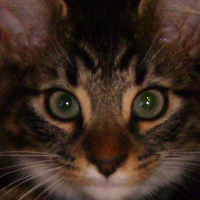

In [4]:
display(preprocess(r'./archive/CAT_00/00000001_017.jpg'))

In [5]:
cnt = 0
for filename in tqdm(os.listdir(r'./archive/CAT_00/')):
    if filename.endswith(".jpg"):
        path = os.path.join(r'./archive/CAT_00/', filename)
        rez = preprocess(path)
        rez.save(r'./cat_images/'+str(cnt)+'.jpg')
        cnt+=1

100%|██████████| 3413/3413 [1:40:19<00:00,  1.76s/it]    


In [6]:
for filename in tqdm(os.listdir(r'./archive/CAT_01/')):
    if filename.endswith(".jpg"):
        path = os.path.join(r'./archive/CAT_01/', filename)
        rez = preprocess(path)
        rez.save(r'./cat_images/'+str(cnt)+'.jpg')
        cnt+=1

100%|██████████| 3237/3237 [00:44<00:00, 73.47it/s] 


In [7]:
for filename in tqdm(os.listdir(r'./archive/CAT_02/')):
    if filename.endswith(".jpg"):
        path = os.path.join(r'./archive/CAT_02/', filename)
        rez = preprocess(path)
        rez.save(r'./cat_images/'+str(cnt)+'.jpg')
        cnt+=1

100%|██████████| 3515/3515 [00:55<00:00, 62.97it/s] 


In [8]:
for filename in tqdm(os.listdir(r'./archive/CAT_03/')):
    if filename.endswith(".jpg"):
        path = os.path.join(r'./archive/CAT_03/', filename)
        rez = preprocess(path)
        rez.save(r'./cat_images/'+str(cnt)+'.jpg')
        cnt+=1

100%|██████████| 1623/1623 [00:18<00:00, 89.53it/s] 


In [9]:
for filename in tqdm(os.listdir(r'./archive/CAT_04/')):
    if filename.endswith(".jpg"):
        path = os.path.join(r'./archive/CAT_04/', filename)
        rez = preprocess(path)
        rez.save(r'./cat_images/'+str(cnt)+'.jpg')
        cnt+=1

100%|██████████| 2793/2793 [00:38<00:00, 72.27it/s] 


In [10]:
for filename in tqdm(os.listdir(r'./archive/CAT_05/')):
    if filename.endswith(".jpg"):
        path = os.path.join(r'./archive/CAT_05/', filename)
        rez = preprocess(path)
        rez.save(r'./cat_images/'+str(cnt)+'.jpg')
        cnt+=1

100%|██████████| 2643/2643 [00:35<00:00, 74.80it/s] 


In [11]:
for filename in tqdm(os.listdir(r'./archive/CAT_06/')):
    if filename.endswith(".jpg"):
        path = os.path.join(r'./archive/CAT_06/', filename)
        rez = preprocess(path)
        rez.save(r'./cat_images/'+str(cnt)+'.jpg')
        cnt+=1

100%|██████████| 2777/2777 [00:30<00:00, 90.46it/s] 
